In [164]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import PIL

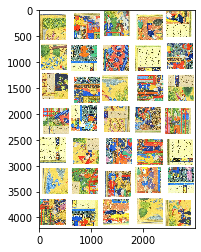

(4200, 3000, 3)
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [165]:
loc = 'C:/Users/sherw/OneDrive/Desktop/DIP_HW1/inputs/P3/zahhak_miniature_puzzle.jpg'
im = np.array(Image.open(loc))

plt.imshow(im)
plt.show()
print(im.shape)
print(im)


In [166]:
height, width, depth = im.shape

# for image with ie. `RGB` color (3 bytes in every pixel)
#width, height, depth = image.shape 

print(width,height,depth)
blocks = []
plt
i = 0
for y in range(0, height, 600):
    for x in range(0, width, 600):
        blocks.append(im[y:y+600, x:x+600])


3000 4200 3


In [167]:
# saving raw pieces:
for i in range(len(blocks)):
    img = Image.fromarray(blocks[i])
    img.save('C:/Users/sherw/OneDrive/Desktop/DIP_HW1/outputs/p3.a.images/raw_piece_{0:0=2d}.jpg'.format(i+1))

In [168]:
# b _ function for extracting main pieces

def crop(block):
    img = block # Read in the image and convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = 255*(gray < 128).astype(np.uint8) # To invert the text to white
    coords = cv2.findNonZero(gray) # Find all non-zero points (text)
    x, y, w, h = cv2.boundingRect(coords) # Find minimum spanning bounding box
    rect = img[y:y+h, x:x+w] # Crop the image - note we do this on the original image
    rect = cv2.resize(rect, (500,500), interpolation = cv2.INTER_AREA)
    return rect

In [169]:
extracted_blocks = []
for img in blocks:
    extracted_blocks.append(crop(img))


In [170]:
# saving extracted pieces:
for i in range(len(extracted_blocks)):
    img = Image.fromarray(extracted_blocks[i])
    img.save('C:/Users/sherw/OneDrive/Desktop/DIP_HW1/outputs/p3.b.images/piece_{0:0=2d}.jpg'.format(i+1))

In [171]:
resized_blocks = []
for i in extracted_blocks:
    i = cv2.resize(i, (100,100), interpolation = cv2.INTER_AREA)
    resized_blocks.append(i)

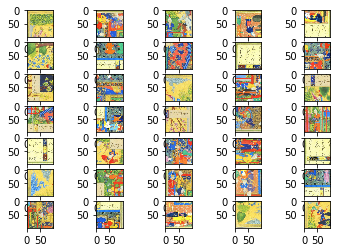

In [172]:
# plotting resized blocks:
shape = np.resize(np.array(resized_blocks), (7,5)).shape
for i in range(len(resized_blocks)):
    plt.subplot2grid(shape, (i//shape[1], i%shape[1]))
    plt.imshow(resized_blocks[i])
plt.show()

In [173]:
#saving resized bloks:
for i in range(len(resized_blocks)):
    img = Image.fromarray(resized_blocks[i])
    img.save('C:/Users/sherw/OneDrive/Desktop/DIP_HW1/outputs/p3.c.images/small_piece_{0:0=2d}.jpg'.format(i+1))

In [174]:
# resized_blocks = np.array(resized_blocks).astype(np.uint)

In [175]:
angles = [0,90,180,270]
all_rot = []
for i in range(len(resized_blocks)):
    all_rot.append([])
    img= Image.fromarray(resized_blocks[i])
    for ang in angles:
        tem_im = img.rotate(ang)
        tem_edge = np.array(tem_im)[0,:]
        all_rot[i].append(tem_edge)


In [176]:
all_rot = np.array(all_rot).astype(np.uint)

In [177]:
match = []
for i in range(len(all_rot)):
    match.append([])
    for j in range(len(all_rot[i])):
        match[i].append([])
        a = all_rot[i][j]
        temp = float("inf")
        for m in range(len(all_rot)):
            if m != i:
                for n in range(len(all_rot[m])):
                    b = all_rot[m][n]
                    b = b[::-1]
#                     print('aaaaaaaaaa')
#                     print(a)
#                     print('bbbbbbbb')
#                     print(b)
#                     print('cccccccccccccc')
#                     print(a.astype(np.int)-b.astype(np.int))
                    c = np.sum(abs(a.astype(np.int)-b.astype(np.int)))
                    if c < temp:
                        temp = np.copy(c)
                        match[i][j] = [m,n]

[[[1, 0], [34, 2], [17, 2], [4, 1]], [[17, 1], [27, 2], [11, 1], [31, 2]], [[5, 1], [5, 0], [19, 0], [26, 0]], [[24, 3], [4, 0], [32, 3], [2, 1]], [[3, 1], [0, 3], [20, 1], [16, 3]], [[2, 1], [2, 0], [21, 3], [33, 0]], [[11, 0], [29, 3], [24, 1], [31, 3]], [[15, 1], [30, 2], [18, 0], [10, 3]], [[31, 1], [31, 0], [24, 0], [31, 1]], [[28, 1], [16, 1], [22, 2], [23, 3]], [[17, 3], [34, 1], [14, 1], [7, 3]], [[6, 0], [1, 2], [30, 0], [22, 0]], [[4, 1], [25, 2], [14, 2], [34, 0]], [[23, 0], [22, 1], [30, 3], [15, 0]], [[15, 2], [10, 2], [12, 2], [21, 1]], [[13, 3], [7, 0], [14, 0], [26, 2]], [[29, 1], [9, 1], [32, 0], [4, 3]], [[18, 3], [1, 0], [0, 2], [10, 0]], [[7, 2], [27, 0], [27, 3], [17, 0]], [[2, 2], [28, 3], [28, 2], [23, 2]], [[29, 2], [4, 2], [24, 3], [24, 2]], [[26, 3], [14, 3], [25, 1], [5, 2]], [[11, 3], [13, 1], [9, 2], [29, 0]], [[13, 0], [26, 1], [19, 3], [9, 3]], [[8, 3], [6, 2], [20, 3], [3, 0]], [[33, 1], [21, 2], [12, 1], [4, 1]], [[2, 3], [23, 1], [15, 3], [21, 0]], [[1

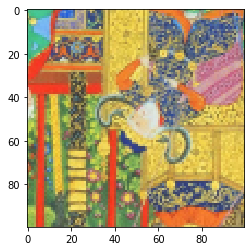

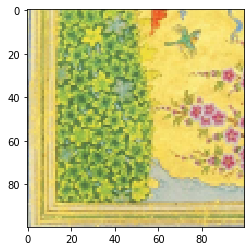

In [178]:
match[8][2] = [24,0] #########
print(match)
# plt.imshow(Image.fromarray(resized_blocks[0]).rotate(90))
# plt.show()
plt.imshow(resized_blocks[30])
plt.show()
plt.imshow(Image.fromarray(resized_blocks[0]).rotate(90))
plt.show()

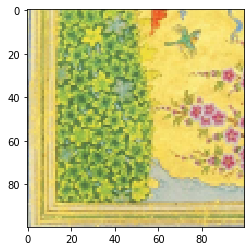

In [179]:
img = resized_blocks[0]

tem_im = np.array(Image.fromarray(img).rotate(90))
plt.imshow(tem_im)

In [180]:
match = np.array(match)

In [181]:
img= Image.fromarray(resized_blocks[i])
tem_im = img.rotate(ang)

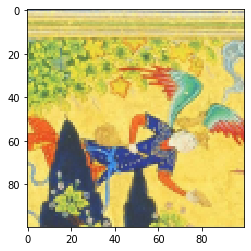

In [182]:
plt.imshow(Image.fromarray(resized_blocks[34]).rotate(360-90))

In [184]:
from matplotlib import gridspec

# d

[34  2]


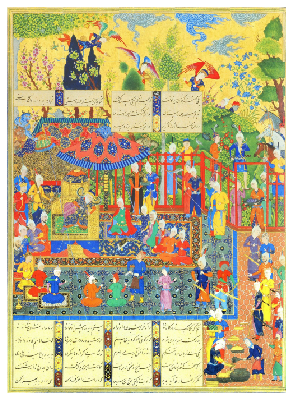

In [200]:
count = 0
num_rot = []
plt.figure(figsize = (5,7.1))

while count <= 34:
    if count==0:
        num_rot.append([count,0])
        plt.subplot2grid(shape, (count//5, count%5))
        plt.imshow(resized_blocks[0])
        plt.axis('off')
        nxt = match[0][1]
        print(nxt)
        
    elif count%5 != 0 and count%5 !=4:
        plt.subplot2grid(shape, (count//5, count%5))
        plt.imshow(Image.fromarray(resized_blocks[nxt[0]]).rotate(360-(3-nxt[1])*90))
        plt.axis('off')
        num_rot.append([nxt[0],(nxt[1]+1)%4])
        if nxt[1]==0:
            nxt = match[nxt[0]][2]
        elif nxt[1]==1:
            nxt = match[nxt[0]][3]
        elif nxt[1]==2:
            nxt = match[nxt[0]][0]
        elif nxt[1]==3:
            nxt = match[nxt[0]][1]
            
    elif count%5 ==4:
        plt.subplot2grid(shape, (count//5, count%5))
        plt.imshow(Image.fromarray(resized_blocks[nxt[0]]).rotate(360-(3-nxt[1])*90))
        plt.axis('off')
        num_rot.append([nxt[0],(nxt[1]+1)%4])
        if num_rot[count-4][1]==0:
            nxt = match[num_rot[count-4][0]][2]
        elif num_rot[count-4][1]==1:
            nxt = match[num_rot[count-4][0]][3]
        elif num_rot[count-4][1]==2:
            nxt = match[num_rot[count-4][0]][0]
        elif num_rot[count-4][1]==3:
            nxt = match[num_rot[count-4][0]][1]
        
    elif count%5 == 0:
        plt.subplot2grid(shape, (count//5, count%5))
        if nxt[1]==0:
            plt.imshow(Image.fromarray(resized_blocks[nxt[0]]).rotate(0))
            plt.axis('off')
            num_rot.append([nxt[0],0])
            nxt = match[nxt[0]][1]
        elif nxt[1]==1:
            plt.imshow(Image.fromarray(resized_blocks[nxt[0]]).rotate(1*90))
            plt.axis('off')
            num_rot.append([nxt[0],1])
            nxt = match[nxt[0]][2]
        elif nxt[1]==2:
            plt.imshow(Image.fromarray(resized_blocks[nxt[0]]).rotate(2*90))
            plt.axis('off')
            num_rot.append([nxt[0],2])
            nxt = match[nxt[0]][3]
        elif nxt[1]==3:
            plt.imshow(Image.fromarray(resized_blocks[nxt[0]]).rotate(3*90))
            plt.axis('off')
            num_rot.append([nxt[0],3])
            nxt = match[nxt[0]][0]
        
    count+=1
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('C:/Users/sherw/OneDrive/Desktop/DIP_HW1/outputs/p3.d.images/lq.jpg')
plt.show()

# e

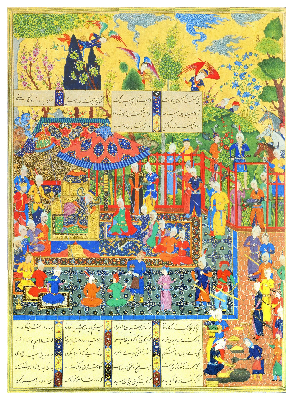

In [198]:
plt.figure(figsize = (5,7.1))
for n in range(35):
        plt.subplot(7,5,n+1)
        plt.imshow(Image.fromarray(extracted_blocks[num_rot[n][0]]).rotate(num_rot[n][1]*90))
        plt.axis('off')
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('C:/Users/sherw/OneDrive/Desktop/DIP_HW1/outputs/p3.e.images/hq.jpg')
plt.show()